# Battery Degradation Analysis of NASA Li-On Batteries

This data-set was cleaned and pre-processed to a certain extent on the Kaggle website. The analysis below intends to pick up further from the cleaned data to conduct further cleaning and exploratory data analysis.

## Load MetaData

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from tqdm import tqdm
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score

data_folder = '/Users/aparnakakarlapudi/Desktop/Practicum/cleaned_dataset'
meta_data = pd.read_csv(os.path.join(data_folder, "updated_metadata.csv"))

In [6]:
meta_data

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct,...,mean_Voltage_measured,std_Battery_impedance,std_Current_charge,std_Current_measured,std_Rectified_Impedance,std_Temperature_measured,std_Voltage_charge,std_Voltage_measured,Impedance_Magnitude_Avg,Impedance_Magnitude_Change_Rate
0,charge,2008-04-02 13:08:17,24,B0005,0,5121,05121.csv,NaN,NaN,NaN,...,NaN,NaN,0.621598,NaN,NaN,1.011951,0.881125,NaN,NaN,NaN
1,discharge,2008-04-02 15:25:41,24,B0005,1,5122,05122.csv,1.8564874208181574,NaN,NaN,...,3.529829,NaN,NaN,0.595058,NaN,3.495804,NaN,0.236558,NaN,NaN
2,charge,2008-04-02 16:37:51,24,B0005,2,5123,05123.csv,NaN,NaN,NaN,...,NaN,NaN,0.662025,NaN,NaN,1.358494,0.710712,NaN,NaN,NaN
3,discharge,2008-04-02 19:43:48,24,B0005,3,5124,05124.csv,1.846327249719927,NaN,NaN,...,3.537320,NaN,NaN,0.596704,NaN,3.435509,NaN,0.235366,NaN,NaN
4,charge,2008-04-02 20:55:40,24,B0005,4,5125,05125.csv,NaN,NaN,NaN,...,NaN,NaN,0.662570,NaN,NaN,1.371851,0.808036,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7560,impedance,2010-09-30 07:36:45,24,B0056,247,7309,07309.csv,NaN,0.10267706871685421,0.17039406000537094,...,NaN,0.052673,NaN,NaN,0.02221,NaN,NaN,NaN,0.131623,NaN
7561,discharge,2010-09-30 08:08:36,4,B0056,248,7310,07310.csv,1.1372731775310292,NaN,NaN,...,3.345642,NaN,NaN,0.640077,NaN,1.998990,NaN,0.277913,NaN,NaN
7562,charge,2010-09-30 08:48:54,4,B0056,249,7311,07311.csv,NaN,NaN,NaN,...,NaN,NaN,0.467016,NaN,NaN,1.155468,0.262042,NaN,NaN,NaN
7563,discharge,2010-09-30 11:50:17,4,B0056,250,7312,07312.csv,1.1290590137779504,NaN,NaN,...,3.349642,NaN,NaN,0.684880,NaN,2.170885,NaN,0.291255,NaN,NaN


In [19]:
actual_data = pd.read_csv(os.path.join(data_folder, "data/00003.csv"))
actual_data

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time
0,3.486189,0.001417,5.990142,-0.0006,0.002,0.000
1,3.746592,1.489057,5.992528,1.4995,4.618,2.594
2,3.775438,1.490426,5.991340,1.4995,4.669,8.922
3,3.794844,1.491527,6.003554,1.4995,4.694,15.234
4,3.811691,1.491425,6.026729,1.4995,4.707,21.516
...,...,...,...,...,...,...
1616,4.213930,0.053584,5.650154,0.0534,4.263,10776.438
1617,4.214202,0.053244,5.669955,0.0534,4.263,10783.156
1618,4.213894,0.054503,5.687639,0.0534,4.263,10789.875
1619,4.214060,0.051309,5.708888,0.0534,4.263,10796.578


## Clean the data

In [8]:
data = '/Users/aparnakakarlapudi/Desktop/Practicum/cleaned_dataset/data'
data_cleaned = '/Users/aparnakakarlapudi/Desktop/Practicum/cleaned_dataset/data_cleaned'
data_files = os.listdir(data)

## Feature Engineering

In [9]:
charge_data = meta_data[meta_data['type'] == 'charge']
chargedata = meta_data[meta_data['type'] == 'discharge']
impedance_data = meta_data[meta_data['type'] == 'impedance']
charge_data

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct,...,mean_Voltage_measured,std_Battery_impedance,std_Current_charge,std_Current_measured,std_Rectified_Impedance,std_Temperature_measured,std_Voltage_charge,std_Voltage_measured,Impedance_Magnitude_Avg,Impedance_Magnitude_Change_Rate
0,charge,2008-04-02 13:08:17,24,B0005,0,5121,05121.csv,NaN,NaN,NaN,...,NaN,NaN,0.621598,NaN,NaN,1.011951,0.881125,NaN,NaN,NaN
2,charge,2008-04-02 16:37:51,24,B0005,2,5123,05123.csv,NaN,NaN,NaN,...,NaN,NaN,0.662025,NaN,NaN,1.358494,0.710712,NaN,NaN,NaN
4,charge,2008-04-02 20:55:40,24,B0005,4,5125,05125.csv,NaN,NaN,NaN,...,NaN,NaN,0.662570,NaN,NaN,1.371851,0.808036,NaN,NaN,NaN
6,charge,2008-04-03 01:12:38,24,B0005,6,5127,05127.csv,NaN,NaN,NaN,...,NaN,NaN,0.661943,NaN,NaN,1.375809,0.770546,NaN,NaN,NaN
8,charge,2008-04-03 05:27:49,24,B0005,8,5129,05129.csv,NaN,NaN,NaN,...,NaN,NaN,0.663962,NaN,NaN,1.387132,0.915524,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7554,charge,2010-09-29 20:31:38,4,B0056,241,7303,07303.csv,NaN,NaN,NaN,...,NaN,NaN,0.464805,NaN,NaN,1.149562,0.261257,NaN,NaN,NaN
7556,charge,2010-09-30 00:13:58,4,B0056,243,7305,07305.csv,NaN,NaN,NaN,...,NaN,NaN,0.461843,NaN,NaN,1.136282,0.261025,NaN,NaN,NaN
7559,charge,2010-09-30 04:31:22,4,B0056,246,7308,07308.csv,NaN,NaN,NaN,...,NaN,NaN,0.449098,NaN,NaN,1.012568,0.259756,NaN,NaN,NaN
7562,charge,2010-09-30 08:48:54,4,B0056,249,7311,07311.csv,NaN,NaN,NaN,...,NaN,NaN,0.467016,NaN,NaN,1.155468,0.262042,NaN,NaN,NaN


In [10]:
charge_files = charge_data['filename'].values
chargefiles = chargedata['filename'].values
impedance_files = impedance_data['filename'].values


def concat_files(files,data_folder):
    random_number_generator = np.random.RandomState(0)
    selected_dfs = []
    for file in tqdm(files):
        df = pd.read_csv(os.path.join(data_folder, "data", file))
        row = random_number_generator.randint(len(df)//2, len(df))
        time = df.iloc[row]['Time']
        rul = df.iloc[-1]['Time'] - time

        agg_features = ['mean','std']
        aggs = df.iloc[:row].agg(agg_features).to_dict()
        features = df.iloc[row].to_dict()
        features['id'] = f"{file.split('.')[0]}"
        features['RUL'] = rul
        for k, v in aggs.items():
            if k == "Time":
                continue   
            for kk, vv in v.items():
                features[f"{k}_{kk}"] = vv
        selected_dfs.append(pd.DataFrame([features]))

    df = pd.concat(selected_dfs)
    print(f'Number of rows: {len(df)}')
    df = df.dropna()
    print(f'Number of rows after dropping nan: {len(df)}')

    return df

charge_df = concat_files(charge_files,data_folder)
chargedf = concat_files(chargefiles,data_folder)

100%|██████████| 2815/2815 [00:34<00:00, 81.29it/s] 


Number of rows: 2815
Number of rows after dropping nan: 2815


100%|██████████| 2794/2794 [00:20<00:00, 134.55it/s]


Number of rows: 2794
Number of rows after dropping nan: 2794


In [11]:
charge_df

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,id,RUL,Voltage_measured_mean,Voltage_measured_std,Current_measured_mean,Current_measured_std,Temperature_measured_mean,Temperature_measured_std,Current_charge_mean,Current_charge_std,Voltage_charge_mean,Voltage_charge_std
0,4.206993,0.113095,24.390592,0.1120,4.278,4125.578,05121,3472.297,4.181005,0.052498,0.877751,0.592716,25.731054,0.912933,0.870986,0.589004,4.605367,0.333250
0,4.211273,1.397367,29.165503,1.3880,4.888,3385.109,05123,7130.891,3.938641,0.158504,1.497321,0.224317,27.347827,0.837723,1.486058,0.224057,4.656302,0.291672
0,4.209556,0.590327,27.411795,0.5870,4.510,4276.969,05125,6207.578,3.970247,0.169312,1.431720,0.290344,27.625754,0.881658,1.420744,0.289010,4.662674,0.274900
0,4.205977,0.256211,25.842167,0.2510,4.342,5347.468,05127,5050.422,3.998265,0.172592,1.313012,0.431785,27.437011,0.895623,1.302801,0.429061,4.637120,0.270838
0,4.205625,0.067982,24.714756,0.0690,4.256,7585.640,05129,2909.563,4.032072,0.176818,1.116512,0.588861,26.985084,1.184735,1.107841,0.584795,4.579157,0.279443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,4.187854,0.033991,6.246789,0.0367,4.208,9910.016,07303,893.203,4.181898,0.030499,0.416317,0.471804,6.298838,1.171901,0.417805,0.472672,4.405322,0.266813
0,4.189197,0.029534,5.907798,0.0335,4.208,10480.343,07305,323.063,4.182834,0.029550,0.394016,0.463905,6.237363,1.153521,0.395477,0.464752,4.394471,0.263075
0,4.188843,0.131941,6.166050,0.1294,4.259,6244.141,07308,4557.891,4.182251,0.025383,0.615559,0.468839,6.383548,1.013633,0.617365,0.469858,4.513815,0.285557
0,4.189401,0.081093,3.878877,0.0815,4.233,7461.547,07311,3342.469,4.179697,0.035856,0.537737,0.490111,6.567091,1.162884,0.539426,0.491090,4.467192,0.282329


# Exploratory Data Analysis - Charge Cycle

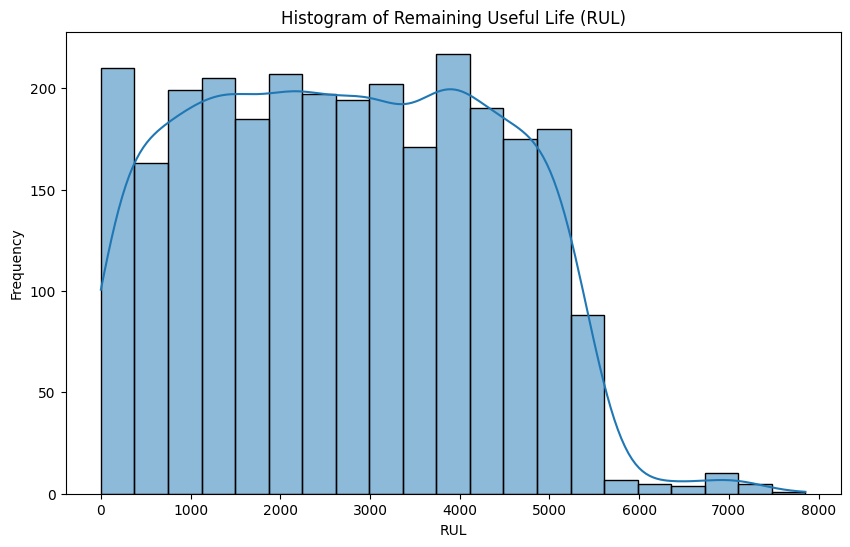

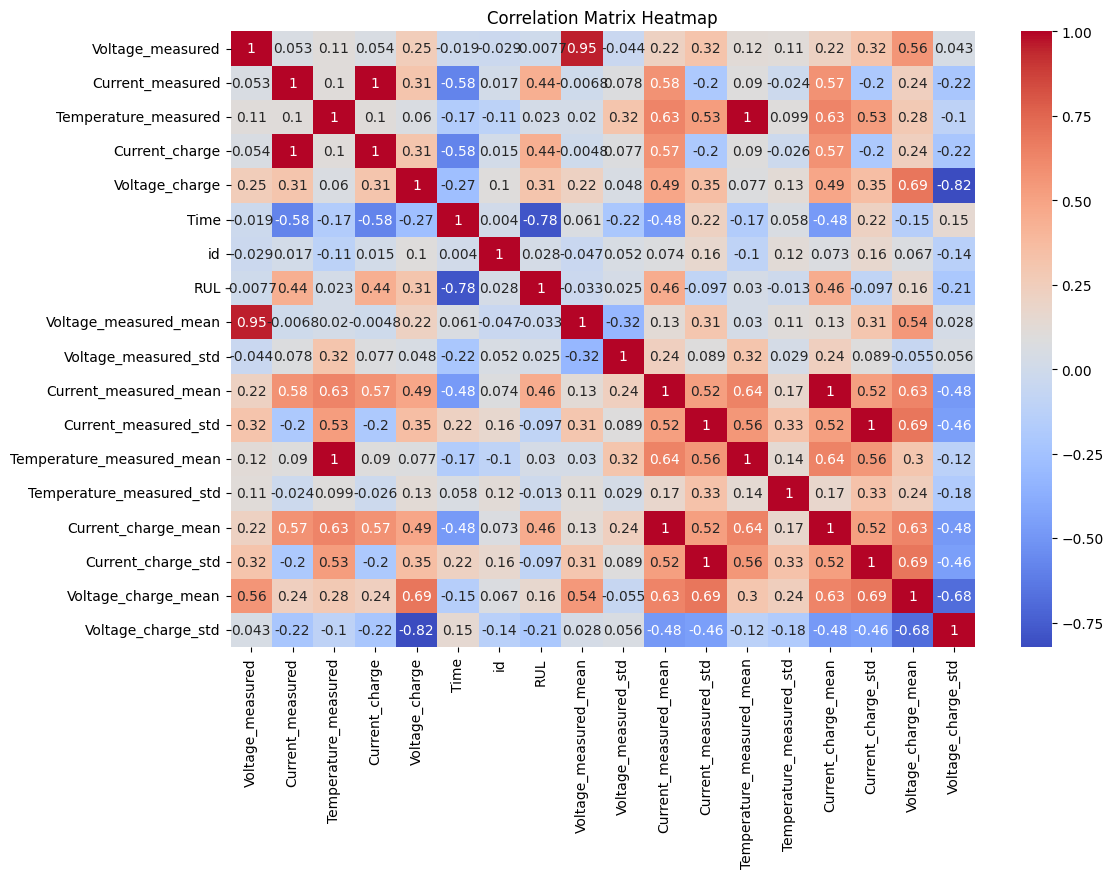

In [12]:
# Histogram of RUL
plt.figure(figsize=(10, 6))
sns.histplot(charge_df['RUL'], kde=True)
plt.title('Histogram of Remaining Useful Life (RUL)')
plt.xlabel('RUL')
plt.ylabel('Frequency')
plt.show()

# Correlation Matrix Heatmap
correlation_matrix = charge_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


Correlation Matrix
- Current measured and current charge show a strong negative correlation with time, which might indicate that as time progresses, the current values tend to decrease
- The variable RUL seems to have some moderate negative correlations with time and some aggregate features, suggesting that these could be important features in predicting the RUL
- Battery Wear Patterns: Negative correlations between 'time' and battery characteristics like 'current measured' or 'current charge' could indicate that as the battery undergoes more charge cycles, its ability to hold or draw a current diminishes. This is a common symptom of battery wear
- The positive correlation between 'voltage measured' and 'voltage charge' could suggest that as the charging voltage increases, the measured voltage of the battery also increases, which is expected. However, if the correlation was weak or negative, it might indicate issues with the battery's charging efficiency or possible measurement errors
- Temperature impact: There's a strong correlation between temperature measured and current measured and current charge. This highlights the impact of temperature on battery performance. 
- Features that correlate with 'RUL', whether positively or negatively, could be key indicators for predicting the battery's remaining life. RUL has a negative correlation with time, this implies that the less time it takes to charge, then the RUL is higher.

Histogram of RUL
- Shape of distribution appears to be right skewed, meaning that there are more charge cycles with lower RUL values and fewer with higher RUL values
- There is a high frequency of charge cycles with RULs between approximately 1000 to 4000, which could represent a common operational duration before a charge cycle ends or before maintenance is required
- The long tail to the right suggests that there are a few charge cycles with very high RUL values, indicating that some batteries or charge cycles last significantly longer than the majority  
- The concentration of charge cycles with lower RUL values suggests that most batteries have a similar operational life expectancy before needing recharging or replacement

In [14]:
charge_train, charge_test = train_test_split(charge_df, test_size=0.2, random_state=42)

drop_cols = ['RUL', 'id']

charge_train_y = charge_train['RUL']
charge_train_X = charge_train.drop(drop_cols, axis=1)

charge_test_y = charge_test['RUL']
charge_test_X = charge_test.drop(drop_cols, axis=1)

# Random Forest Model

In [15]:
# Assuming charge_train_X is your training features and charge_train_y is the target variable
rf_model = RandomForestRegressor(random_state=355)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, charge_train_X, charge_train_y, cv=5, scoring='neg_mean_absolute_error')

# Convert scores to positive values (since cross_val_score returns negative values for 'neg_mean_absolute_error')
cv_scores = -cv_scores

# Calculate the average and standard deviation of the MAE from cross-validation
cv_mae_mean = cv_scores.mean()
cv_mae_std = cv_scores.std()

print(f"Mean MAE from cross-validation: {cv_mae_mean}")
print(f"Standard Deviation of MAE from cross-validation: {cv_mae_std}")


Mean MAE from cross-validation: 159.13728963172213
Standard Deviation of MAE from cross-validation: 8.80650978105495


MAE: 171.03757435168734
R2S: 0.9267432239820375
Feature ranking:
Time: 0.8163037681056037
Current_measured: 0.06197926964503199
Current_charge: 0.027512772211770314
Temperature_measured_mean: 0.024273317495041174
Voltage_charge_mean: 0.015845892037074844
Temperature_measured: 0.014537253300465484
Current_charge_mean: 0.00759748657937824
Voltage_measured_mean: 0.006977655053421746
Current_measured_std: 0.0047780386849945716
Current_charge_std: 0.0044708770056596315
Current_measured_mean: 0.00419748834719857
Voltage_charge_std: 0.002566345311117845
Voltage_charge: 0.002565008146107621
Temperature_measured_std: 0.0025201335377274168
Voltage_measured: 0.002107415619776364
Voltage_measured_std: 0.0017672789196305173


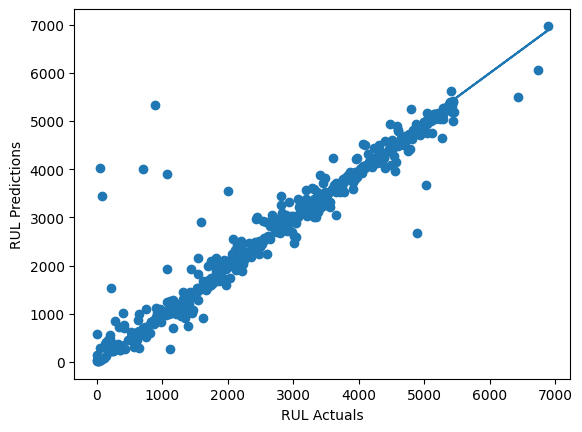

In [27]:
charge_rf_model = RandomForestRegressor(random_state=355)
charge_rf_model.fit(charge_train_X, charge_train_y)

charge_rf_preds = charge_rf_model.predict(charge_test_X)
charge_rf_mae = mean_absolute_error(charge_test_y, charge_rf_preds)
charge_rf_r2 = r2_score(charge_test_y, charge_rf_preds)
print(f"MAE: {charge_rf_mae}")
print(f"R2S: {charge_rf_r2}")

# get feature importance
charge_rf_importances = charge_rf_model.feature_importances_
charge_rf_indices = np.argsort(charge_rf_importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(charge_train_X.shape[1]):
    print(f"{charge_train_X.columns[charge_rf_indices[f]]}: {charge_rf_importances[charge_rf_indices[f]]}")

# plot test_y, preds
plt.scatter(charge_test_y, charge_rf_preds)
plt.plot(charge_test_y, charge_test_y)
plt.xlabel('RUL Actuals')
plt.ylabel('RUL Predictions')
plt.savefig("rul_nasa.png")

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Assuming discharge_train_X and discharge_train_y are your features and target variable respectively
charge_rf_model = RandomForestRegressor(random_state=355)

# Perform 5-fold cross-validation
scores = cross_val_score(charge_rf_model, charge_train_X, charge_train_y, cv=10, scoring='neg_mean_absolute_error')

# Perform 5-fold cross-validation and calculate R squared metric
r2_scores = cross_val_score(charge_rf_model, charge_train_X, charge_train_y, cv=10, scoring='r2')

# Print the R squared scores for each fold
print("R squared scores for each fold:", r2_scores)

# Calculate and print the mean R squared score across all folds
print("Mean R squared score:", r2_scores.mean())

# Convert scores to positive. cross_val_score returns negative values for MAE and MSE as these are "losses" that the function tries to minimize
mae_scores = -scores

print(f"MAE scores for each fold are: {mae_scores}")
print(f"Average MAE across all folds: {np.mean(mae_scores)}")
print(f"Standard deviation of MAE across all folds: {np.std(mae_scores)}")


R squared scores for each fold: [0.97978664 0.93444913 0.93607193 0.89686563 0.96197237 0.92668172
 0.97821329 0.97566431 0.96993133 0.96796165]
Mean R squared score: 0.952759800040635
MAE scores for each fold are: [141.10298354 172.98670518 144.85647516 176.6164056  143.30336991
 182.01321716 153.71344058 147.43686009 139.68116458 155.78882853]
Average MAE across all folds: 155.74994503168142
Standard deviation of MAE across all folds: 14.97282500928317


# XGB Model

MAE: 170.94696898595544
R2S: 0.9504536251539146
Feature ranking:
Time: 0.6434118747711182
Current_charge: 0.14098230004310608
Current_measured: 0.04928360506892204
Voltage_charge_mean: 0.0486270897090435
Temperature_measured_mean: 0.02802569791674614
Temperature_measured: 0.021843183785676956
Current_measured_mean: 0.020718462765216827
Current_charge_mean: 0.012518126517534256
Voltage_measured_mean: 0.006976786069571972
Current_measured_std: 0.006866746582090855
Voltage_charge: 0.0050875404849648476
Current_charge_std: 0.0041888924315571785
Voltage_measured: 0.0035939186345785856
Temperature_measured_std: 0.003043899778276682
Voltage_measured_std: 0.0024923791643232107
Voltage_charge_std: 0.002339467639103532


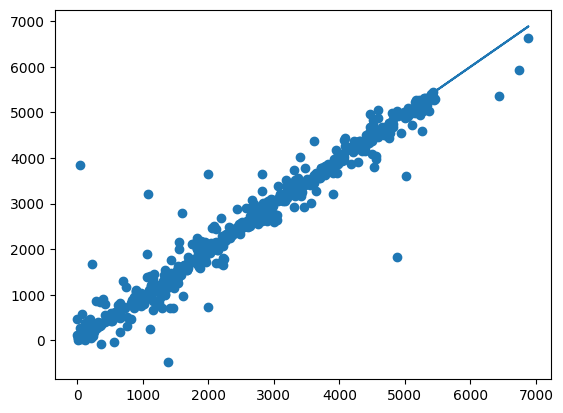

In [23]:
import xgboost as xgb

charge_xgb_model = xgb.XGBRegressor(random_state=355)
charge_xgb_model.fit(charge_train_X, charge_train_y)

charge_xgb_preds = charge_xgb_model.predict(charge_test_X)
charge_xgb_mae = mean_absolute_error(charge_test_y, charge_xgb_preds)
charge_xgb_r2 = r2_score(charge_test_y, charge_xgb_preds)
print(f"MAE: {charge_xgb_mae}")
print(f"R2S: {charge_xgb_r2}")

# get feature importance
charge_xgb_importances = charge_xgb_model.feature_importances_
charge_xgb_indices = np.argsort(charge_xgb_importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(charge_train_X.shape[1]):
    print(f"{charge_train_X.columns[charge_xgb_indices[f]]}: {charge_xgb_importances[charge_xgb_indices[f]]}")

# plot test_y, preds
plt.scatter(charge_test_y, charge_xgb_preds)
plt.plot(charge_test_y, charge_test_y)
plt.xlabel('RUL Actuals')
plt.ylabel('RUL Predictions')
plt.savefig("rul_nasa.png")

In [25]:
# Perform 5-fold cross-validation and compute the R2 score
cv_r2_scores_xgb = cross_val_score(charge_xgb_model, charge_train_X, charge_train_y, cv=10, scoring='r2')
# Perform 5-fold cross-validation and compute the negative MAE
cv_mae_scores_xgb = cross_val_score(charge_xgb_model, charge_train_X, charge_train_y, cv=10, scoring='neg_mean_absolute_error')

# Negate the scores to get positive MAE values
cv_mae_scores_xgb = -cv_mae_scores_xgb


print("Cross-Validation R2 scores for XGB model:", cv_r2_scores_xgb)
print("Mean CV R2 score for XGB model:", cv_r2_scores_xgb.mean())
print("Cross-Validation MAE scores for XGB model:", cv_mae_scores_xgb)
print("Mean CV MAE score for XGB model:", cv_mae_scores_xgb.mean())


Cross-Validation R2 scores for XGB model: [0.98030235 0.93351886 0.93602477 0.90430292 0.9711646  0.94017412
 0.96748244 0.97466695 0.9702777  0.97398803]
Mean CV R2 score for XGB model: 0.9551902737090652
Cross-Validation MAE scores for XGB model: [142.84402888 188.23081096 153.63475042 175.02668972 139.91943101
 183.6177047  173.21448006 156.92960615 149.88648957 155.50795996]
Mean CV MAE score for XGB model: 161.88119514431764


### LGBM Model

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3906
[LightGBM] [Info] Number of data points in the train set: 2252, number of used features: 16
[LightGBM] [Info] Start training from score 2746.625026
MAE: 178.540028089124
R2S: 0.9404667526348676
Feature ranking:
Time: 654
Temperature_measured_mean: 249
Temperature_measured: 212
Voltage_measured: 206
Temperature_measured_std: 200
Voltage_charge_mean: 194
Voltage_charge_std: 193
Voltage_measured_std: 165
Voltage_charge: 153
Current_charge: 139
Voltage_measured_mean: 129
Current_measured: 128
Current_measured_std: 125
Current_measured_mean: 121
Current_charge_std: 66
Current_charge_mean: 66


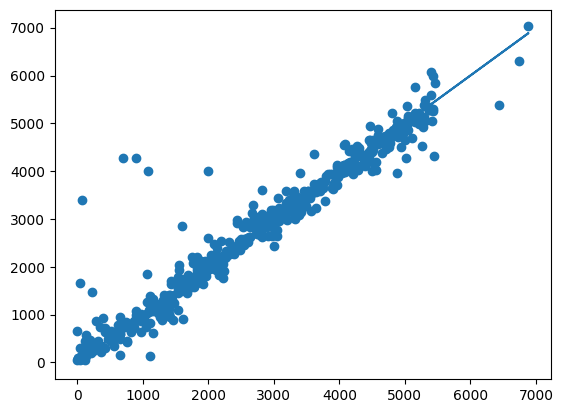

In [18]:
import lightgbm

charge_lgb_model = lightgbm.LGBMRegressor(random_state=355)
charge_lgb_model.fit(charge_train_X, charge_train_y)

charge_lgb_preds = charge_lgb_model.predict(charge_test_X)
charge_lgb_mae = mean_absolute_error(charge_test_y, charge_lgb_preds)
charge_lgb_r2 = r2_score(charge_test_y, charge_lgb_preds)
print(f"MAE: {charge_lgb_mae}")
print(f"R2S: {charge_lgb_r2}")

# get feature importance
charge_lgb_importances = charge_lgb_model.feature_importances_
charge_lgb_indices = np.argsort(charge_lgb_importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(charge_train_X.shape[1]):
    print(f"{charge_train_X.columns[charge_lgb_indices[f]]}: {charge_lgb_importances[charge_lgb_indices[f]]}")

# plot test_y, preds
plt.scatter(charge_test_y, charge_lgb_preds)
plt.plot(charge_test_y, charge_test_y)
plt.savefig("rul_nasa.png")

In [24]:
# R-squared scores
cv_r2_scores_lgb = cross_val_score(charge_lgb_model, charge_train_X, charge_train_y, cv=5, scoring='r2')
# MAE scores
cv_mae_scores_lgb = cross_val_score(charge_lgb_model, charge_train_X, charge_train_y, cv=5, scoring='neg_mean_absolute_error')
cv_mae_scores_lgb = -cv_mae_scores_lgb  # Convert to positive MAE scores

print("Cross-Validation R2 scores for LGBM model:", cv_r2_scores_lgb)
print("Mean CV R2 score for LGBM model:", cv_r2_scores_lgb.mean())
print("Cross-Validation MAE scores for LGBM model:", cv_mae_scores_lgb)
print("Mean CV MAE score for LGBM model:", cv_mae_scores_lgb.mean())

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3903
[LightGBM] [Info] Number of data points in the train set: 1801, number of used features: 16
[LightGBM] [Info] Start training from score 2737.774077
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3902
[LightGBM] [Info] Number of data points in the train set: 1801, number of used features: 16
[LightGBM] [Info] Start training from score 2734.714356
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3903
[LightGBM] [Info] Number of data points in the train set: 1802, number of used features: 16
[LightGBM] [Info] Start 